In [1]:
import nest_asyncio
from dotenv import load_dotenv

from langchain_openai import ChatOpenAI

from src.database import VectorDB, ExtractDocs
from src.model import *
from src.utils import check_required_env_vars

nest_asyncio.apply()
load_dotenv()

/Users/ifish/Documents/Github/louis.ai/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [2]:
check_required_env_vars()

{}

In [3]:
db = VectorDB()

In [3]:
ExtractDocs("pdf").extract("/Users/ifish/Documents/Github/louis.ai/data/Constitution_of_the_Republic_of_Singapore.pdf")

Started parsing the file under job_id 895a7e69-0e50-4dca-94a5-229106536e2e


[Document(metadata={'id': '8d1a00cc-54b0-4dc7-a15a-33e8454ea8f6'}, page_content='Constitution of the Republic of Singapore\n  Table of Contents\n  Part 1 PRELIMINARY\n       1 Citation\n       2 Interpretation\n  Part 2 THE REPUBLIC AND THE CONSTITUTION\n       3 Republic of Singapore\n       4 Supremacy of Constitution\n       5 Amendment of Constitution\n  Part 3 PROTECTION OF THE SOVEREIGNTY OF THE REPUBLIC OF\n  SINGAPORE\n       6 No surrender of sovereignty or relinquishment of control over the\n       Police Force or the Armed Forces except by referendum\n       7 Participation in co-operative international schemes which are\n       beneficial to Singapore\n       8 No amendment to this Part except by referendum\n  Part 4 FUNDAMENTAL LIBERTIES\n       9 Liberty of the person\n       10 Slavery and forced labour prohibited\n       11 Protection against retrospective criminal laws and repeated trials\nSingapore Statutes Online    Current version as at 27 Jan 2025  PDF created date

In [11]:
query = """Tell me about the Liberty of the person under the constitution of Singapore:
(5)  Clauses (3) and (4) shall not apply to an enemy alien or to any person arrested for 
contempt of Parliament pursuant to a warrant issued under the hand of the Speaker."""
# query = "Can I count to the number 30 with someone else's hands?"
# query = "Is it legal to call someone a 'dumb dumb bubblegum'?"
# query = "人を殺すってだめですか？"
# query = "Would it be illegal if I went 'bippity boppity, I'mma steal your intellectual property' in Singapore?"
# query = "Is it illegal to be stupid in Singapore?"
# query = "What is the weather today"

In [12]:
vectorstore_summary = "It includes the reliable information of the constitution of the republic of Singapore."

model = ChatOpenAI(model="gpt-4o-mini", temperature=0)

inputs = {
    "query": query,
    "db": db,
    "model": model,
    "vectorstore_summary": vectorstore_summary,
    "retrieved_docs":[""],
    "depth": 0,
    "excluded_file_ids": set(),
}

response = build_graph()
app = response.compile()

output = app.invoke(inputs)

In [13]:
from pprint import pprint

pprint(output)

{'complexity': 'low',
 'compliance': True,
 'compliance_reason': 'The response accurately reflects the provisions of '
                      'Article 9 of the Singapore Constitution regarding '
                      'personal liberty and unlawful detention.',
 'db': <src.database.VectorDB object at 0x169cf3750>,
 'depth': 1,
 'excluded_file_ids': {'0d4db2e6-6637-402a-b578-82efc94a18cd',
                       '1966624f-13dd-4be1-82e4-04010f1006de',
                       '99ac58a5-6c71-42e7-be41-714279ea0ee4'},
 'hallucination': False,
 'hallucination_reason': 'The statement accurately reflects the provisions of '
                         'Article 9 of the Constitution of Singapore regarding '
                         'personal liberty and unlawful detention.',
 'model': ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x173cd39d0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x173cd3c50>, root_client=<openai.OpenAI object at 0x1

In [14]:
print(output["response"].content)

### **Liberty of the Person under the Constitution of Singapore**

- **Legal Basis**: The liberty of the person in Singapore is primarily governed by Article 9 of the Constitution of the Republic of Singapore. This article states:
  1. **Clause 9(1)**: "No person shall be deprived of his life or personal liberty save in accordance with law."
  2. **Clause 9(2)**: "Where a complaint is made to the General Division of the High Court or any Judge sitting in the General Division of the High Court that a person is being unlawfully detained, the General Division of the High Court shall inquire into the complaint and, unless satisfied that the detention is lawful, shall order him to be produced before the General Division of the High Court and release him."

- **Explanation**: Article 9(1) establishes the fundamental right to personal liberty, ensuring that no individual can be deprived of their liberty without legal justification. This clause emphasizes the rule of law, meaning that any depr

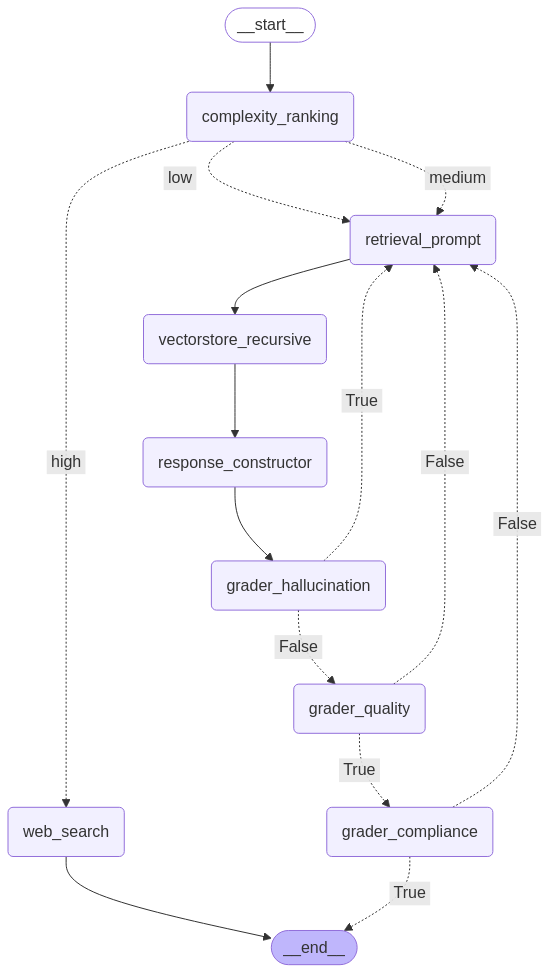

In [7]:
app